<a href="https://colab.research.google.com/github/phuongnt3391/Timeseries/blob/main/Champagnesales_autoARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [42]:
df = pd.read_csv('Champagne Sales.csv')

In [43]:
df.head()

,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Month            105 non-null    object
 1   Champagne sales  105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [45]:
df['Month'] = pd.to_datetime(df['Month'])

In [46]:
df.dtypes

Month              datetime64[ns]
Champagne sales             int64
dtype: object

In [47]:
df.shape

(105, 2)

In [48]:
df.set_index('Month',inplace=True)

In [49]:
df.head()

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [50]:
df.columns

Index(['Champagne sales'], dtype='object')

In [51]:
df = df.rename(columns={'Champagne sales':'sales'})

In [52]:
df.head()

,sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [53]:
training_data = df[0:85]
test_data =df[85:]

In [54]:
training_data

,sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1970-09-01,5221
1970-10-01,6424
1970-11-01,9842


In [55]:
test_data

,sales
Month,
1971-02-01,3162
1971-03-01,4286
1971-04-01,4676
1971-05-01,5010
1971-06-01,4874
1971-07-01,4633
1971-08-01,1659
1971-09-01,5951
1971-10-01,6981


Draw the graph over time to check stationarity

In [56]:
plt.figure(figsize=(10,8),dpi=150)
px.line(df,x=df.index,y=df['sales'])

<Figure size 1500x1200 with 0 Axes>

From the above, we can observe that there is a seasonality associated with the data. Every year there is a spike in increasing sales which continued from 1964 to 1972

In [57]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['sales'])

(-1.8335930563276228,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '10%': -2.583636712914788,
  '5%': -2.8931578098779522},
 1478.4633060594724)

p-value is greater than 0.05, so there are weak evidences to reject null hypothesis, we can NOT reject the null hypothesis, data is NOT stationary

Auto-Regressive (p) -> Number of autoregressive terms.

Integrated (d) -> Number of nonseasonal differences needed for stationarity.

Moving Average (q) -> Number of lagged forecast errors in the prediction equation.

In the Auto ARIMA model, note that small p,d,q values represent non-seasonal components, and capital P, D, Q represent seasonal components. It works similarly like hyper tuning techniques to find the optimal value of p, d, and q with different combinations and the final values would be determined with the lower AIC, BIC parameters taking into consideration.



In [58]:
!pip install pmdarima

In [61]:
from pmdarima import auto_arima

In [ ]:
Here, I am trying with the p, d, q values ranging from 0 to 5 to get the optimal values from the model

In [62]:
model = auto_arima(training_data,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.38 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.32 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.64 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.26 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.04 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.46 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.703, Time=1.51 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.44 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Fri, 24 Sep 2021   AIC                           1174.564
Time:                                     12:29:23   BIC                           1183.670
Sample:                                          0   HQIC                          1178.189
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.543      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.134      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
model.fit(training_data['sales'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [65]:
prediction = model.predict(n_periods=len(test_data))

In [66]:
test_data['prediction_ARIMA'] = prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



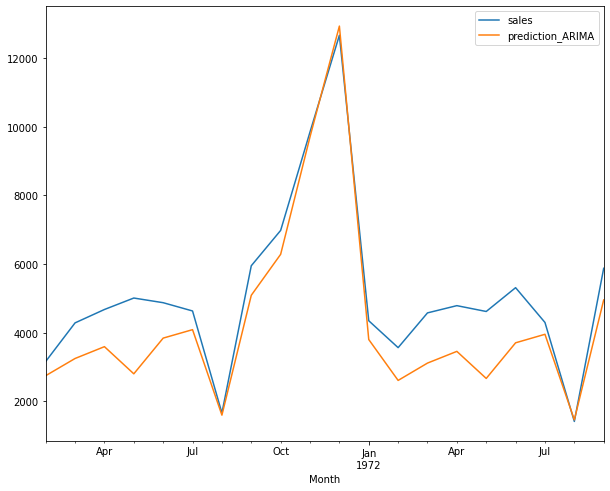

In [67]:
test_data[['sales','prediction_ARIMA']].plot(figsize=(10,8))

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [69]:
from sklearn.metrics import r2_score

In [70]:
r2_score(test_data['sales'], test_data['prediction_ARIMA'])

0.8114750591885855

r2_score is 0.81 greater than 0.5 it is a good sign to be understood as 81% of (dependent variable) ~ Champagne sales are explained by the model

In [71]:
np.sqrt(mean_squared_error(test_data['prediction_ARIMA'],test_data['sales']))

1060.2443879983828

In [72]:
mean_absolute_error(test_data['prediction_ARIMA'],test_data['sales'])

876.194908056086